RandomForest = Переобученные Деревья + Bootstrap + RandomSubSpace, без распараллеливания

До oob руки не дошли, но идейно - обучаем на всех данных, усредняем предсказания только на тех деревьях, которые не обучались на данном наблюдении. <br>
Вместо этого просто valid ошибка (самодельный accuracy)

In [1]:
import numpy as np
from decision_tree_clas import MyDecisionTree

In [2]:
class MyRandomForest:
    def __init__(self):
        self.forest = None

    def fit(self, X, y, n_trees):
        self.forest = []

        for i in range(n_trees):
            ind = np.random.choice(X.shape[0], X.shape[0], replace=True)
            p = np.random.randint(0, X.shape[1], int(np.sqrt(X.shape[1])))
            tmp = MyDecisionTree(max_depth=17, min_samples=3)
            tmp.fit(X[ind][:, p], y[ind])
            self.forest.append((tmp, p))


    def predict(self, X):
        res = []

        for tree, p in self.forest:
            res.append(tree.predict(X[:, p]))

        return np.array(res).mean(axis=0)

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# np.random.seed(42)
dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, train_size=0.7)

In [4]:
kop = MyRandomForest()
kop.fit(X_train, y_train, 100)
((kop.predict(X_test)>0.5) == y_test).mean()

np.float64(0.9532163742690059)

In [5]:
from sklearn.ensemble import RandomForestClassifier

pok = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt')
pok.fit(X_train, y_train)
(pok.predict(X_test) == y_test).mean()


np.float64(0.9298245614035088)

In [6]:
y_test[y_test != (kop.predict(X_test) > 0.5)], y_test[y_test != pok.predict(X_test)]

(array([0, 0, 1, 0, 0, 0, 1, 0]), array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]))

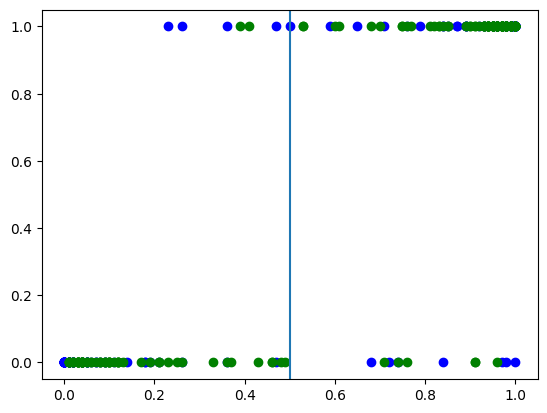

In [7]:
import matplotlib.pyplot as plt

plt.scatter(pok.predict_proba(X_test)[:, 1].round(2), y_test, c='b')
plt.scatter(kop.predict(X_test).round(2), y_test, c='g')
plt.axvline(0.5)